# Creating Structural Model of the Northern Coast of Rio Grande do Sul state, south Brazil

This notebook presents the code used in the main study to model the hydrostratigraphy of the Northern Coast of Rio Grande do Sul state, south Brazil.

The idea here is to develop a preliminary geological model of the northern part of Rio Grande do Sul coastline, 
based on the conceptual model and respective paper by Troian, G. C., Reginato, P. A. R., Marquezan, R. G., 
& Kirchheim, R. (2020). Modelo conceitual hidroestratigráfico do sistema  aquifero costeiro no litoral norte 
do Estado do Rio Grande Do Sul, available at https://rigeo.cprm.gov.br/bitstream/doc/21817/1/Troian_etal_2020.pdf. We also use data from vertical electrical sounding from Collischonn, L., & da Camara Rosa, M. L. C. (2022). Genesis of a coastal aquifer in the coastal plain of the Pelotas Basin, southern Brazil: Implications for stratigraphic evolution, available at https://doi.org/10.1016/j.jsames.2022.103801.



## Importing Libraries

In [1]:
# Importing GemPy
import gempy as gp

#Importing Gemgis
import gemgis as gg

# Importing auxiliary libraries
import os
import numpy as np
import pandas as pd
import pyvista as pv
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pyvistaqt import BackgroundPlotter
from shapely.geometry import Polygon, box

No module named 'osgeo'


WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Checking Versions

In [2]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

gempy==2.3.1
gemgis==1.1.0
numpy==1.25.2
pandas==2.0.1
pyvista==0.39.1
geopandas==0.14.0


## Defining File Path

In [3]:
# Return current working directory
cwd = os.getcwd()
data_path = '02_Model_Brazil/'
data_path

'02_Model_Brazil/'

## Loading Interface Data

In [4]:
interfaces = pd.read_csv(data_path + 'Geomodel_all_data.csv', delimiter=',')
interfaces['X'] = interfaces['X_original']
interfaces['Y'] = interfaces['Y_original']
interfaces.head()

,ID,X_original,Y_original,Elevation,Z_not_corrected_elevation,Z,azimuth,dip,polarity,formation,series,id,Dataset,X,Y
0,4300008570,576363.00,6683132.00,28.00,-26.00,2.00,0,0,1,unit1,Unit1,1,SIAGAS,576363.00,6683132.00
1,4300008570,576363.00,6683132.00,28.00,-70.00,-42.00,0,0,1,unit2,Unit2,2,SIAGAS,576363.00,6683132.00
2,4300008570,576363.00,6683132.00,28.00,-91.00,-63.00,0,0,1,unit3,Unit3,3,SIAGAS,576363.00,6683132.00
3,4300025396,587283.00,6694846.00,4.00,-27.00,-23.00,0,0,1,unit1,Unit1,1,SIAGAS,587283.00,6694846.00
4,4300025396,587283.00,6694846.00,4.00,-60.00,-56.00,0,0,1,unit2,Unit2,2,SIAGAS,587283.00,6694846.00


## Plotting Input Data

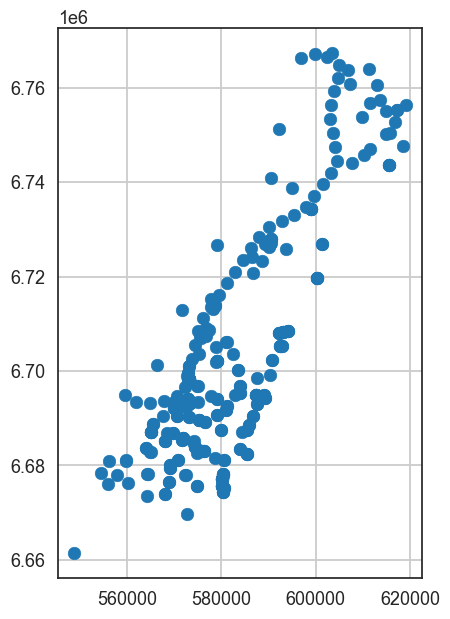

In [5]:
plt.scatter(interfaces['X'], interfaces['Y'])
plt.gca().set_aspect('equal')
plt.grid()

## Loading Orientation Data

In [6]:
orientations = pd.read_csv(data_path + 'Geomodel_all_data.csv', delimiter=',')
orientations['X'] = orientations['X_original']
orientations['Y'] = orientations['Y_original']
orientations.head()

,ID,X_original,Y_original,Elevation,Z_not_corrected_elevation,Z,azimuth,dip,polarity,formation,series,id,Dataset,X,Y
0,4300008570,576363.00,6683132.00,28.00,-26.00,2.00,0,0,1,unit1,Unit1,1,SIAGAS,576363.00,6683132.00
1,4300008570,576363.00,6683132.00,28.00,-70.00,-42.00,0,0,1,unit2,Unit2,2,SIAGAS,576363.00,6683132.00
2,4300008570,576363.00,6683132.00,28.00,-91.00,-63.00,0,0,1,unit3,Unit3,3,SIAGAS,576363.00,6683132.00
3,4300025396,587283.00,6694846.00,4.00,-27.00,-23.00,0,0,1,unit1,Unit1,1,SIAGAS,587283.00,6694846.00
4,4300025396,587283.00,6694846.00,4.00,-60.00,-56.00,0,0,1,unit2,Unit2,2,SIAGAS,587283.00,6694846.00


# Defining Extent

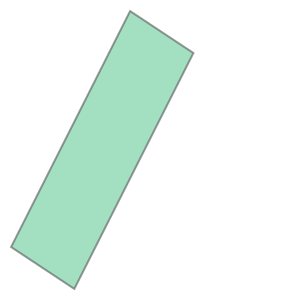

In [7]:
extent = Polygon([[598966, 6774880, -1200],
                   [625836, 6757079, -1200],
                   [575263, 6656908, 20],
                   [548426, 6674680, 20]])
extent

## Rotating Input Data

In [8]:
extent_rotated, interfaces_rotated, orientations_rotated, extent_gdf = gg.utils.rotate_gempy_input_data(extent=extent,
                                                                                                        interfaces=interfaces,
                                                                                                        orientations=orientations,
                                                                                                        zmin=-1200,
                                                                                                        zmax=20,
                                                                                                        return_extent_gdf=True,
                                                                                                        rotate_reverse_direction=True
                                                                                                        )
interfaces_rotated.head()

,ID,X_original,Y_original,Elevation,Z_not_corrected_elevation,Z,azimuth,dip,polarity,formation,series,Dataset,X,Y,geometry
0,4300008570,576363.00,6683132.00,28.00,-26.00,2.00,0.00,0.00,1.00,unit1,Unit1,SIAGAS,592285.43,6681796.62,POINT (592285.433 6681796.615)
1,4300008570,576363.00,6683132.00,28.00,-70.00,-42.00,0.00,0.00,1.00,unit2,Unit2,SIAGAS,592285.43,6681796.62,POINT (592285.433 6681796.615)
2,4300008570,576363.00,6683132.00,28.00,-91.00,-63.00,0.00,0.00,1.00,unit3,Unit3,SIAGAS,592285.43,6681796.62,POINT (592285.433 6681796.615)
3,4300025396,587283.00,6694846.00,4.00,-27.00,-23.00,0.00,0.00,1.00,unit1,Unit1,SIAGAS,596754.19,6697174.99,POINT (596754.195 6697174.989)
4,4300025396,587283.00,6694846.00,4.00,-60.00,-56.00,0.00,0.00,1.00,unit2,Unit2,SIAGAS,596754.19,6697174.99,POINT (596754.195 6697174.989)


In [9]:
orientations_rotated.head()

,ID,X_original,Y_original,Elevation,Z_not_corrected_elevation,Z,azimuth,dip,polarity,formation,series,Dataset,X,Y,geometry
0,4300008570,576363.00,6683132.00,28.00,-26.00,2.00,0.00,0.00,1.00,unit1,Unit1,SIAGAS,592285.43,6681796.62,POINT (592285.433 6681796.615)
1,4300008570,576363.00,6683132.00,28.00,-70.00,-42.00,0.00,0.00,1.00,unit2,Unit2,SIAGAS,592285.43,6681796.62,POINT (592285.433 6681796.615)
2,4300008570,576363.00,6683132.00,28.00,-91.00,-63.00,0.00,0.00,1.00,unit3,Unit3,SIAGAS,592285.43,6681796.62,POINT (592285.433 6681796.615)
3,4300025396,587283.00,6694846.00,4.00,-27.00,-23.00,0.00,0.00,1.00,unit1,Unit1,SIAGAS,596754.19,6697174.99,POINT (596754.195 6697174.989)
4,4300025396,587283.00,6694846.00,4.00,-60.00,-56.00,0.00,0.00,1.00,unit2,Unit2,SIAGAS,596754.19,6697174.99,POINT (596754.195 6697174.989)


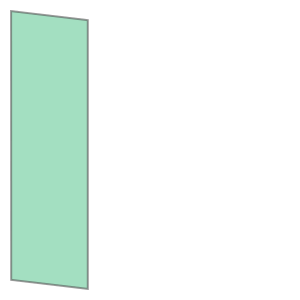

In [10]:
extent_gdf.iloc[0].geometry

In [11]:
extent_rotated

[571111.750529875,
 603120.7909417241,
 6657889.481161896,
 6773883.646208731,
 -1200,
 20]

## Plotting Input Data

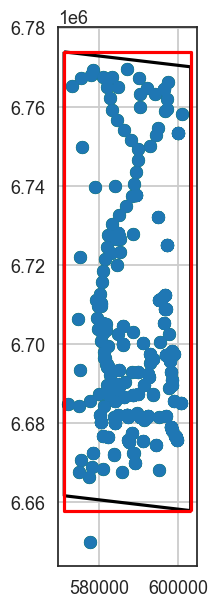

In [12]:
fig, ax = plt.subplots(1, figsize=(7,7))

extent_gdf.boundary.plot(ax=ax, color='black')
interfaces_rotated.plot(ax=ax, color='green')
orientations_rotated.plot(ax=ax)
gpd.GeoDataFrame(geometry=[box(*extent_gdf.total_bounds)]).boundary.plot(ax=ax, color='red')
plt.grid()

## Creating GemPy Model

In [13]:
geo_model = gp.create_model('RS_northern_coast')
geo_model

RS_northern_coast  2023-09-17 08:47

## Initiating Data

In [14]:
geo_model = gp.init_data(geo_model,
                         extent = extent_rotated,
                         resolution = [128,400,120],
                         surface_points_df=interfaces_rotated,
                         orientations_df=orientations_rotated,
                         default_values=True
                         )                      

Active grids: ['regular']


## Check area of interest coordinates

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


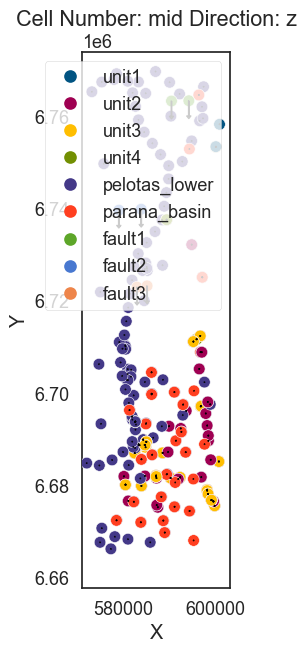

In [15]:
fig_2D = gp.plot_2d(geo_model, direction=['z'])

## Map Surfaces to Stack

In [16]:
#Add surfaces and define names to match the ones in the paper. In this case surface and series have the same name, but in the future as more detail is given to the model each series will have more surfaces.

gp.map_stack_to_surfaces(geo_model,
                         {
                          "Fault1": ('fault1'),
                          "Fault2": ('fault2'),
                          "Fault3": ('fault3'),
                          "Unit1": ('unit1'),
                          "Unit2": ('unit2'),
                          "Unit3": ('unit3'),
                          "Unit4": ('unit4'),
                          "Pelotas_Basin_Lower": ('pelotas_lower'),
                          "Parana_Province": ('parana_basin'),
                          # "Basement": ('basement')
                         },
                          remove_unused_series=True)
geo_model.add_surfaces('basement')
geo_model.surfaces

,surface,series,order_surfaces,color,id
6,fault1,Fault1,1,#015482,1
7,fault2,Fault2,1,#9f0052,2
8,fault3,Fault3,1,#ffbe00,3
0,unit1,Unit1,1,#728f02,4
1,unit2,Unit2,1,#443988,5
2,unit3,Unit3,1,#ff3f20,6
3,unit4,Unit4,1,#5DA629,7
4,pelotas_lower,Pelotas_Basin_Lower,1,#4878d0,8
5,parana_basin,Parana_Province,1,#ee854a,9
9,basement,Parana_Province,2,#6acc64,10


## Inspecting Surfaces

In [17]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
6,fault1,Fault1,1,False,False,True,True,#015482,NaN,NaN,NaN,1
7,fault2,Fault2,1,False,False,True,True,#9f0052,NaN,NaN,NaN,2
8,fault3,Fault3,1,False,False,True,True,#ffbe00,NaN,NaN,NaN,3
0,unit1,Unit1,1,False,False,True,True,#728f02,NaN,NaN,NaN,4
1,unit2,Unit2,1,False,False,True,True,#443988,NaN,NaN,NaN,5
2,unit3,Unit3,1,False,False,True,True,#ff3f20,NaN,NaN,NaN,6
3,unit4,Unit4,1,False,False,True,True,#5DA629,NaN,NaN,NaN,7
4,pelotas_lower,Pelotas_Basin_Lower,1,False,False,True,True,#4878d0,NaN,NaN,NaN,8
5,parana_basin,Parana_Province,1,False,False,True,True,#ee854a,NaN,NaN,NaN,9
9,basement,Parana_Province,2,True,False,True,True,#6acc64,NaN,NaN,NaN,10


In [18]:
gg.utils.show_number_of_data_points(geo_model)

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id,No. of Interfaces,No. of Orientations
6,fault1,Fault1,1,False,False,True,True,#015482,NaN,NaN,NaN,1,2,2
7,fault2,Fault2,1,False,False,True,True,#9f0052,NaN,NaN,NaN,2,2,2
8,fault3,Fault3,1,False,False,True,True,#ffbe00,NaN,NaN,NaN,3,2,2
0,unit1,Unit1,1,False,False,True,True,#728f02,NaN,NaN,NaN,4,56,56
1,unit2,Unit2,1,False,False,True,True,#443988,NaN,NaN,NaN,5,57,57
2,unit3,Unit3,1,False,False,True,True,#ff3f20,NaN,NaN,NaN,6,34,34
3,unit4,Unit4,1,False,False,True,True,#5DA629,NaN,NaN,NaN,7,8,8
4,pelotas_lower,Pelotas_Basin_Lower,1,False,False,True,True,#4878d0,NaN,NaN,NaN,8,125,125
5,parana_basin,Parana_Province,1,False,False,True,True,#ee854a,NaN,NaN,NaN,9,29,29
9,basement,Parana_Province,2,True,False,True,True,#6acc64,NaN,NaN,NaN,10,0,0


## Map Stack to Surfaces again

In [19]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
6,fault1,Fault1,1,False,False,True,True,#015482,NaN,NaN,NaN,1
7,fault2,Fault2,1,False,False,True,True,#9f0052,NaN,NaN,NaN,2
8,fault3,Fault3,1,False,False,True,True,#ffbe00,NaN,NaN,NaN,3
0,unit1,Unit1,1,False,False,True,True,#728f02,NaN,NaN,NaN,4
1,unit2,Unit2,1,False,False,True,True,#443988,NaN,NaN,NaN,5
2,unit3,Unit3,1,False,False,True,True,#ff3f20,NaN,NaN,NaN,6
3,unit4,Unit4,1,False,False,True,True,#5DA629,NaN,NaN,NaN,7
4,pelotas_lower,Pelotas_Basin_Lower,1,False,False,True,True,#4878d0,NaN,NaN,NaN,8
5,parana_basin,Parana_Province,1,False,False,True,True,#ee854a,NaN,NaN,NaN,9
9,basement,Parana_Province,2,True,False,True,True,#6acc64,NaN,NaN,NaN,10


## Defining Faults

In [20]:
#Defining the 'Fault_Series' (Torres/Terra de Areia - Posadas) points as fault points. 
#Note that the azimuth of those faults was shifted to consider the -25° angle because of the rotation matrix applied here.
geo_model.set_is_fault([
                        'Fault1',
                        'Fault2', 
                        'Fault3'
                        ])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Fault3,3,Fault,True,True,False
Unit1,4,Erosion,True,False,False
Unit2,5,Erosion,True,False,False
Unit3,6,Erosion,True,False,False
Unit4,7,Erosion,True,False,False
Pelotas_Basin_Lower,8,Erosion,True,False,False
Parana_Province,9,Erosion,True,False,False


## Checking fault relationships with geological units

In [21]:
geo_model.faults.faults_relations_df

,Fault1,Fault2,Fault3,Unit1,Unit2,Unit3,Unit4,Pelotas_Basin_Lower,Parana_Province
Fault1,False,False,False,True,True,True,True,True,True
Fault2,False,False,False,True,True,True,True,True,True
Fault3,False,False,False,True,True,True,True,True,True
Unit1,False,False,False,False,False,False,False,False,False
Unit2,False,False,False,False,False,False,False,False,False
Unit3,False,False,False,False,False,False,False,False,False
Unit4,False,False,False,False,False,False,False,False,False
Pelotas_Basin_Lower,False,False,False,False,False,False,False,False,False
Parana_Province,False,False,False,False,False,False,False,False,False


## Defining the relation between the faults and the other units

In [22]:
# In our case, we want the faults to cut only the Parana Basin and the basement.

fr = np.zeros((9,9))
fr[0, 7] = True
fr[0, 8] = True
fr[1, 7] = True
fr[1, 8] = True
fr[2, 7] = True
fr[2, 8] = True

geo_model.set_fault_relation(fr)

,Fault1,Fault2,Fault3,Unit1,Unit2,Unit3,Unit4,Pelotas_Basin_Lower,Parana_Province
Fault1,False,False,False,False,False,False,False,True,True
Fault2,False,False,False,False,False,False,False,True,True
Fault3,False,False,False,False,False,False,False,True,True
Unit1,False,False,False,False,False,False,False,False,False
Unit2,False,False,False,False,False,False,False,False,False
Unit3,False,False,False,False,False,False,False,False,False
Unit4,False,False,False,False,False,False,False,False,False
Pelotas_Basin_Lower,False,False,False,False,False,False,False,False,False
Parana_Province,False,False,False,False,False,False,False,False,False


## Inspecting Surfaces

In [23]:
#Check if all surfaces are active:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
6,fault1,Fault1,1,False,True,True,True,#527682,NaN,NaN,NaN,1
7,fault2,Fault2,1,False,True,True,True,#527682,NaN,NaN,NaN,2
8,fault3,Fault3,1,False,True,True,True,#527682,NaN,NaN,NaN,3
0,unit1,Unit1,1,False,False,True,True,#728f02,NaN,NaN,NaN,4
1,unit2,Unit2,1,False,False,True,True,#443988,NaN,NaN,NaN,5
2,unit3,Unit3,1,False,False,True,True,#ff3f20,NaN,NaN,NaN,6
3,unit4,Unit4,1,False,False,True,True,#5DA629,NaN,NaN,NaN,7
4,pelotas_lower,Pelotas_Basin_Lower,1,False,False,True,True,#4878d0,NaN,NaN,NaN,8
5,parana_basin,Parana_Province,1,False,False,True,True,#ee854a,NaN,NaN,NaN,9
9,basement,Parana_Province,2,True,False,True,True,#6acc64,NaN,NaN,NaN,10


## Inspecting Stack

In [24]:
#Check bottom relationships between units:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Fault3,3,Fault,True,True,False
Unit1,4,Erosion,True,False,False
Unit2,5,Erosion,True,False,False
Unit3,6,Erosion,True,False,False
Unit4,7,Erosion,True,False,False
Pelotas_Basin_Lower,8,Erosion,True,False,False
Parana_Province,9,Erosion,True,False,False


## Setting Relations

In [25]:
#Set onlap relationships between units:
geo_model.set_bottom_relation(["Unit1", 
                               "Unit2", 
                               "Unit3", 
                               "Unit4", 
                               "Pelotas_Basin_Lower",
                               "Parana_Province",
                               ],
                              ['Onlap',
                               'Onlap',
                               'Onlap', 
                               'Onlap',
                               'Onlap',
                               'Erosion', #Parana_Province
                               ]) #Basement

,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Fault3,3,Fault,True,True,False
Unit1,4,Onlap,True,False,False
Unit2,5,Onlap,True,False,False
Unit3,6,Onlap,True,False,False
Unit4,7,Onlap,True,False,False
Pelotas_Basin_Lower,8,Onlap,True,False,False
Parana_Province,9,Erosion,True,False,False


## Plotting Input Data

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


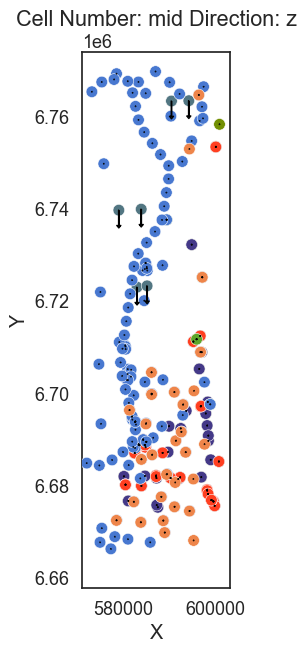

In [26]:
# Plotting points in 2D. Adjust as needed.
gp.plot_2d(geo_model, direction=['z'], ve=1, show_topography=False, legend=False)

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


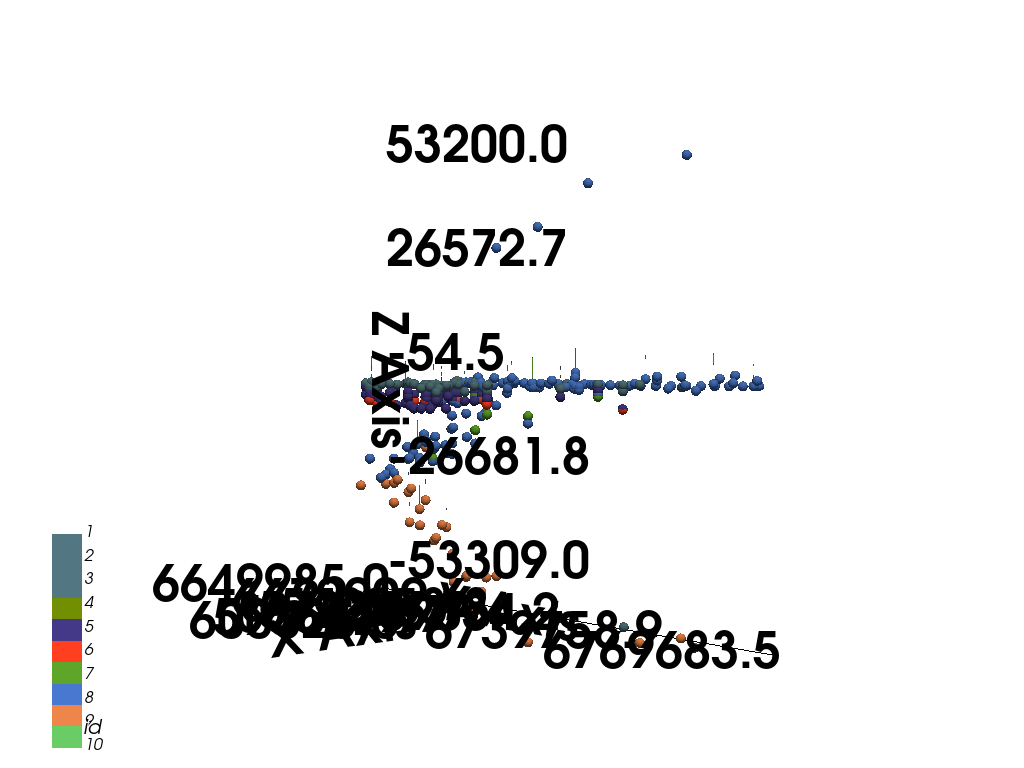

In [27]:
# Plotting points in 3D. Adjust as needed.
gp.plot_3d(geo_model, ve=50, show_topography=False, notebook=True)

## Setting Interpolator

In [28]:
gp.set_interpolator(geo_model,
                    compile_aesara=True,
                    aesara_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  3
Compilation Done!
Kriging values: 
                                       values
range                              120335.84
$C_o$                           344778890.31
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3]


## Computing Model

In [29]:
#Compute model
gp.compute_model(geo_model)

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\aesara\tensor\elemwise.py:785: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)



Lithology ids 
  [10.         10.         10.         ...  8.99999587  8.99971087
  8.9801311 ] 

## Plotting Model Results

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


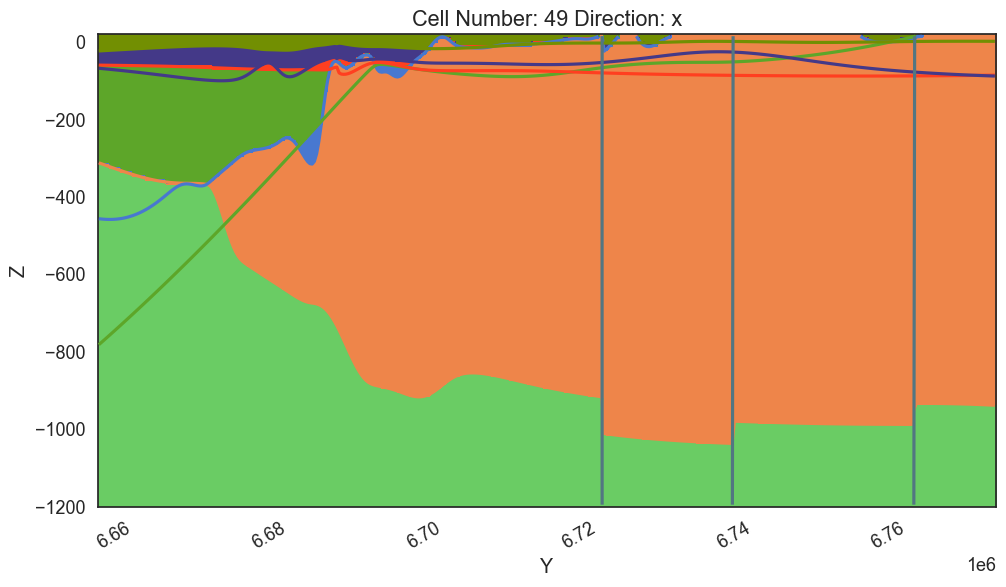

In [30]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['x'], ve=50, show_topography=False, show_data=False, legend=False, cell_number=[49])

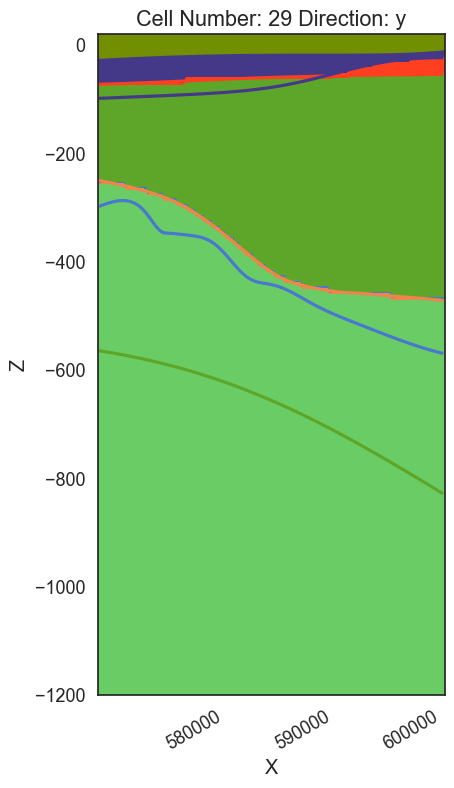

In [31]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['y'], ve=50, show_topography=False, show_data=False, cell_number=[29])

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


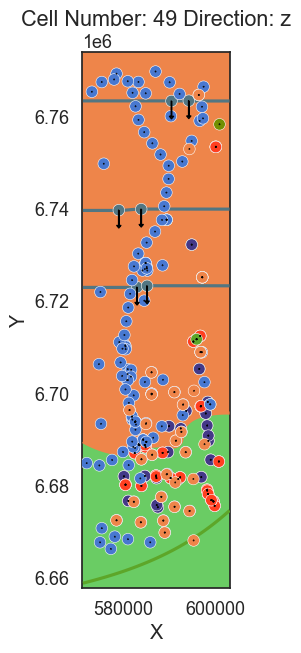

In [32]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['z'], ve=1, show_topography=False, show_data=True, legend=False, cell_number=[49])

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


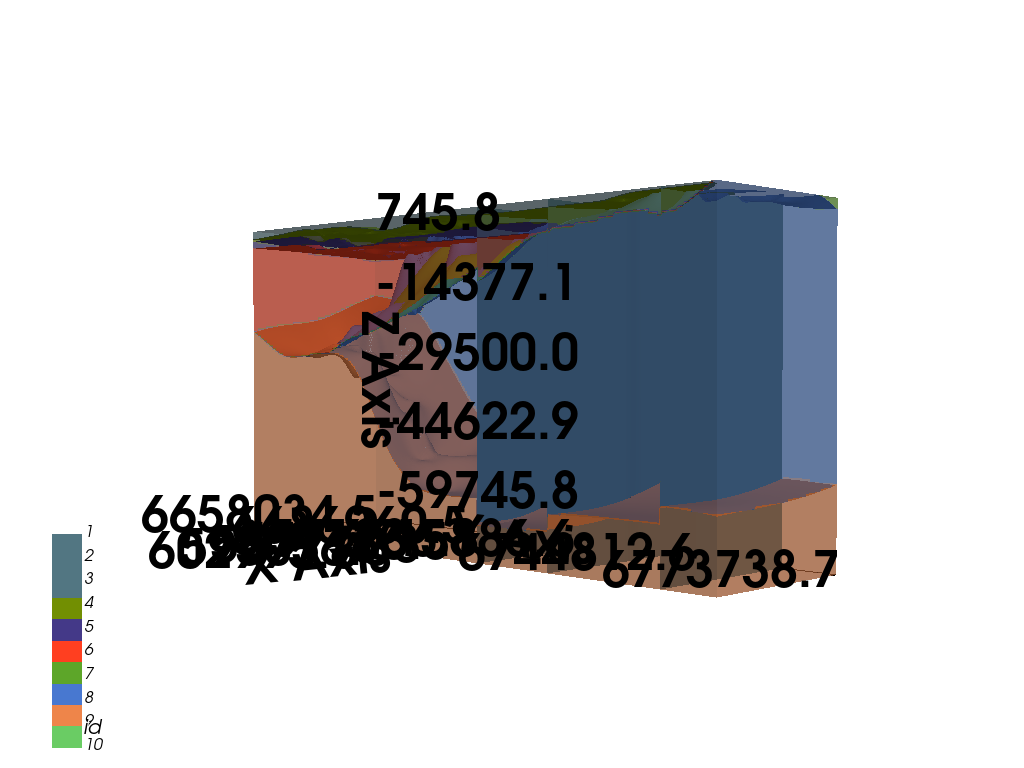

In [33]:
# Plotting the model in 3D with vertical exaggeration (ve (float); change number as needed):
gp.plot_3d(geo_model, ve=50, show_topography=False, show_data=False, notebook=True)

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


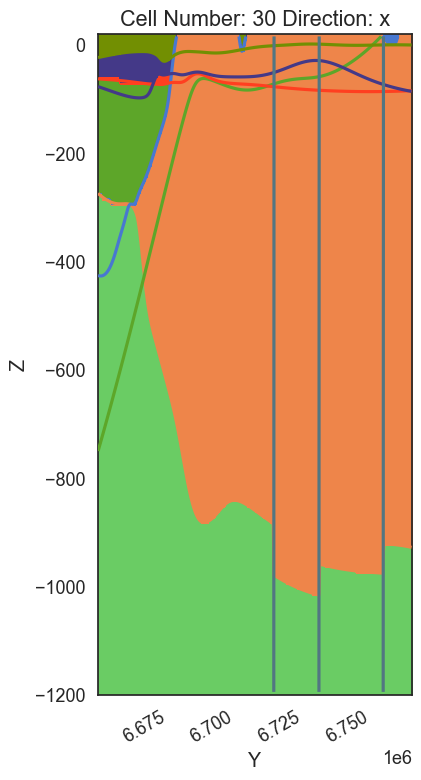

In [35]:
# Plotting topography 2D with vertical exaggeration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['x'], ve=200, show_topography=False, cell_number=[30], show_data=False)

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


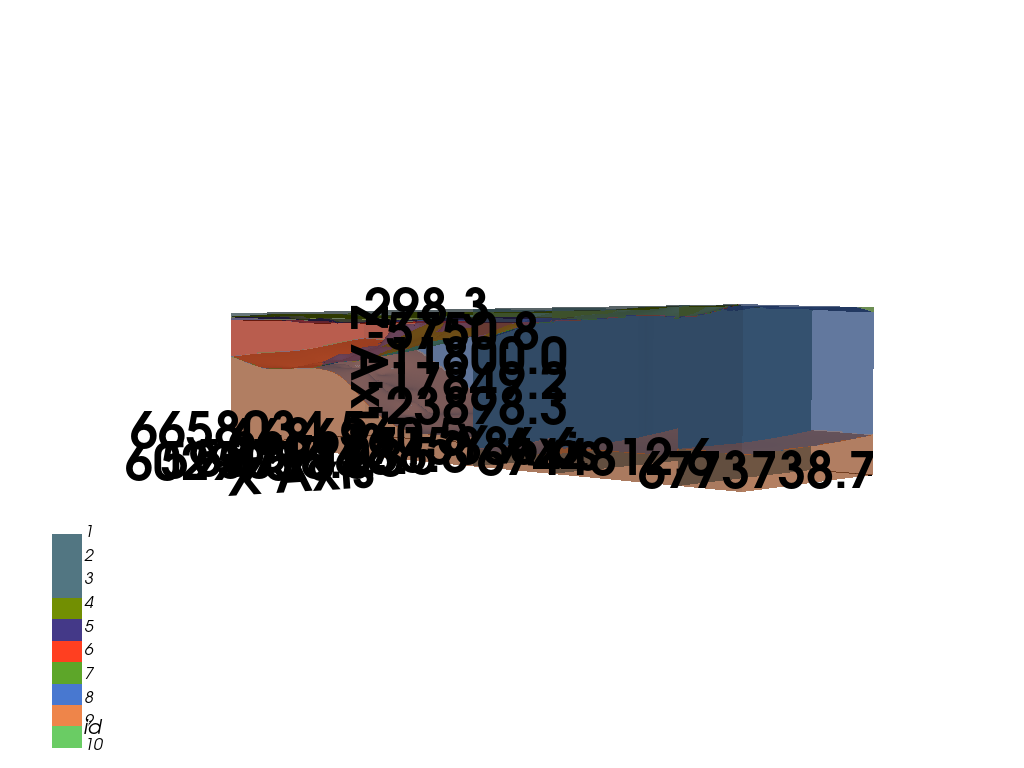

In [36]:
# Plotting topography 3D with vertical exaggeration (ve (float); change number as needed):
gp.plot_3d(geo_model, notebook=True, ve=20, show_topography=False, show_data=False)

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


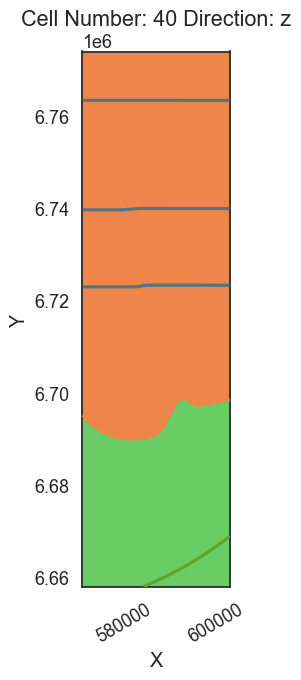

In [37]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['z'], ve=1, show_topography=False, show_data=False, legend=False, cell_number=[40])

In [38]:
# Access the computed data from Gempy
data = geo_model.solutions.lith_block
data

array([10.        , 10.        , 10.        , ...,  8.99999587,
        8.99971087,  8.9801311 ])

In [39]:
gp.save_model(geo_model, name='Final_model', path=data_path, compress=False)

True

## Extracting Depth Maps

In [58]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit1 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='unit1')

mesh1 = dict_unit1['unit1'][0]
mesh1.save('mesh1.vtk')
mesh1

PolyData (0x207b6019c60)
  N Cells:    68144
  N Points:   34975
  N Strips:   0
  X Bounds:   5.712e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.773e+06
  Z Bounds:   -3.898e+01, 9.721e+00
  N Arrays:   1

In [59]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit2 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
         
                                                           surfaces='unit2')
mesh2 = dict_unit2['unit2'][0]
mesh2.save('mesh2.vtk')
mesh2

PolyData (0x207b601a2c0)
  N Cells:    21056
  N Points:   11938
  N Strips:   0
  X Bounds:   5.750e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.744e+06
  Z Bounds:   -9.692e+01, -1.881e+01
  N Arrays:   1

In [60]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit3 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='unit3')

mesh3 = dict_unit3['unit3'][0]
mesh3.save('mesh3.vtk')
mesh3

PolyData (0x207b601ac20)
  N Cells:    41686
  N Points:   21378
  N Strips:   0
  X Bounds:   5.715e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.736e+06
  Z Bounds:   -8.952e+01, -5.184e+01
  N Arrays:   1

In [61]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit4 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='unit4')

mesh4 = dict_unit4['unit4'][0]
mesh4.save('mesh4.vtk')
mesh4

PolyData (0x207b6019de0)
  N Cells:    18000
  N Points:   9926
  N Strips:   0
  X Bounds:   5.790e+05, 6.030e+05
  Y Bounds:   6.684e+06, 6.768e+06
  Z Bounds:   -3.918e+02, 1.492e+01
  N Arrays:   1

In [62]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_pelotas_lower = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='pelotas_lower')

meshpl = dict_pelotas_lower['pelotas_lower'][0]
meshpl.save('meshpl.vtk')
meshpl

PolyData (0x207b6019f00)
  N Cells:    91136
  N Points:   46919
  N Strips:   0
  X Bounds:   5.712e+05, 6.030e+05
  Y Bounds:   6.667e+06, 6.774e+06
  Z Bounds:   -4.900e+02, 1.492e+01
  N Arrays:   1

In [63]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_parana_basin = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='parana_basin')

meshpar = dict_parana_basin['parana_basin'][0]
meshpar.save('meshpar.vtk')
meshpar

PolyData (0x207b6018be0)
  N Cells:    137868
  N Points:   69835
  N Strips:   0
  X Bounds:   5.712e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.774e+06
  Z Bounds:   -1.067e+03, -2.230e+02
  N Arrays:   1

In [46]:
mesh1

PolyData (0x207b5f5e440)
  N Cells:    68144
  N Points:   34975
  N Strips:   0
  X Bounds:   5.712e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.773e+06
  Z Bounds:   -3.898e+01, 9.721e+00
  N Arrays:   1

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


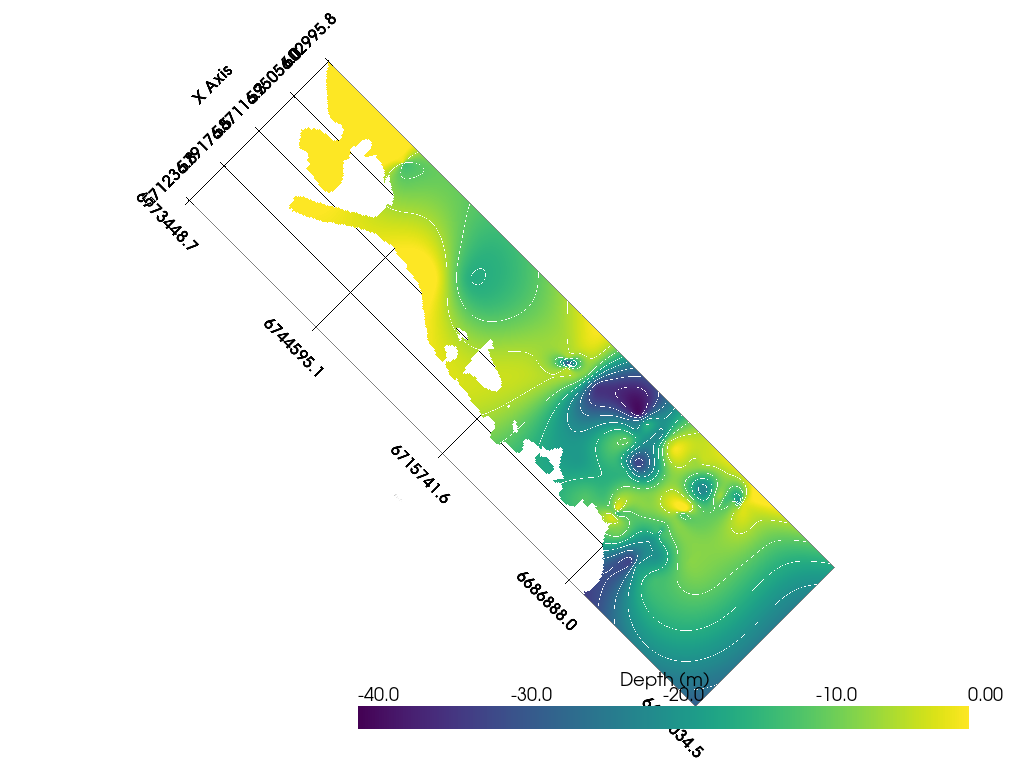

In [47]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([1, 1, 0])
p.add_mesh(mesh1.contour(np.arange(-100,0,5)), color='white')
p.add_mesh(mesh1, scalars='Depth [m]', show_scalar_bar=False, clim = [-40,0])
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black', font_size=12)
p.set_scale(zscale=1)
p.show()

In [48]:
mesh2

PolyData (0x207b5f5e860)
  N Cells:    21056
  N Points:   11938
  N Strips:   0
  X Bounds:   5.750e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.744e+06
  Z Bounds:   -9.692e+01, -1.881e+01
  N Arrays:   1

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


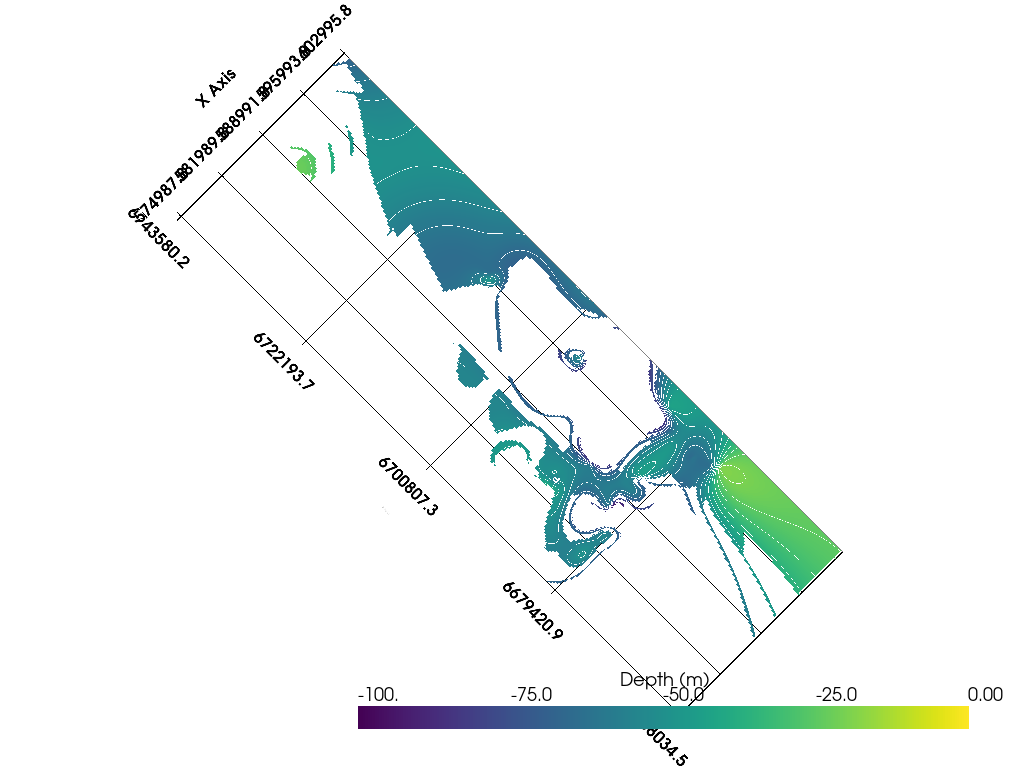

In [49]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([1, 1, 0])
p.add_mesh(mesh2.contour(np.arange(-100,0,5)), color='white')
p.add_mesh(mesh2, scalars='Depth [m]', show_scalar_bar=False, clim = [-100,0])
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black', font_size=12)
p.set_scale(zscale=1)
p.show()

In [50]:
mesh3

PolyData (0x2081b6f2860)
  N Cells:    41686
  N Points:   21378
  N Strips:   0
  X Bounds:   5.715e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.736e+06
  Z Bounds:   -8.952e+01, -5.184e+01
  N Arrays:   1

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


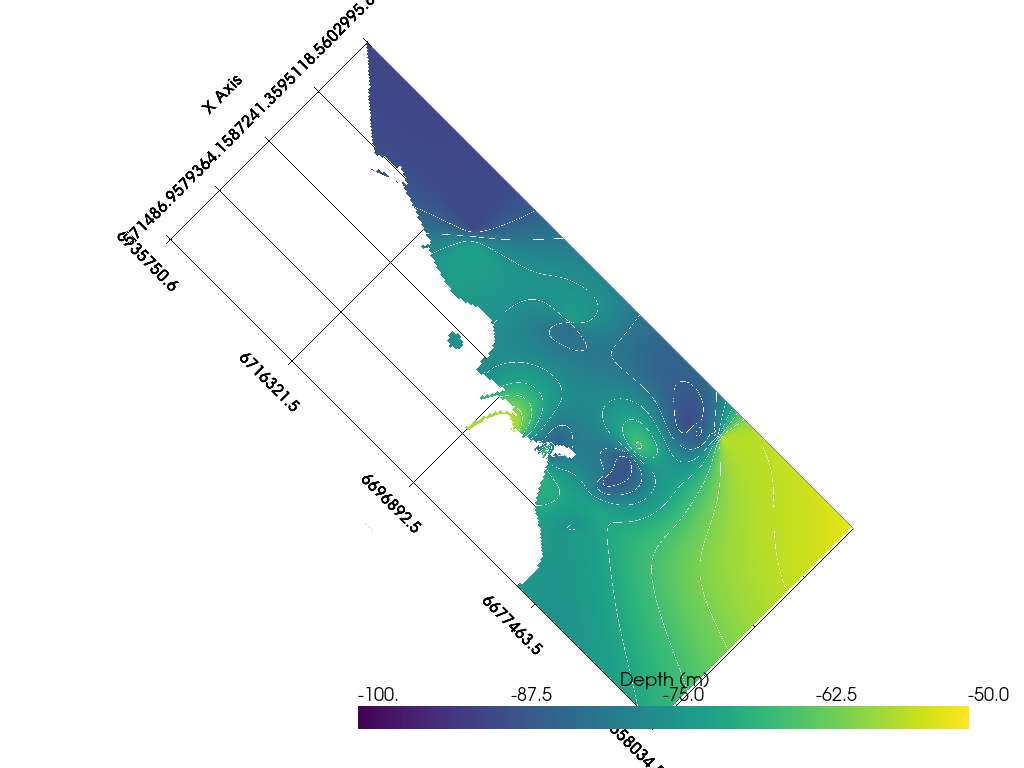

In [51]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([1, 1, 0])
p.add_mesh(mesh3.contour(np.arange(-100,0,5)), color='white')
p.add_mesh(mesh3, scalars='Depth [m]', show_scalar_bar=False, clim = [-100,-50])
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black', font_size=12)
p.set_scale(zscale=1)
p.show()

In [52]:
mesh4

PolyData (0x207b5f5e9e0)
  N Cells:    18000
  N Points:   9926
  N Strips:   0
  X Bounds:   5.790e+05, 6.030e+05
  Y Bounds:   6.684e+06, 6.768e+06
  Z Bounds:   -3.918e+02, 1.492e+01
  N Arrays:   1

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


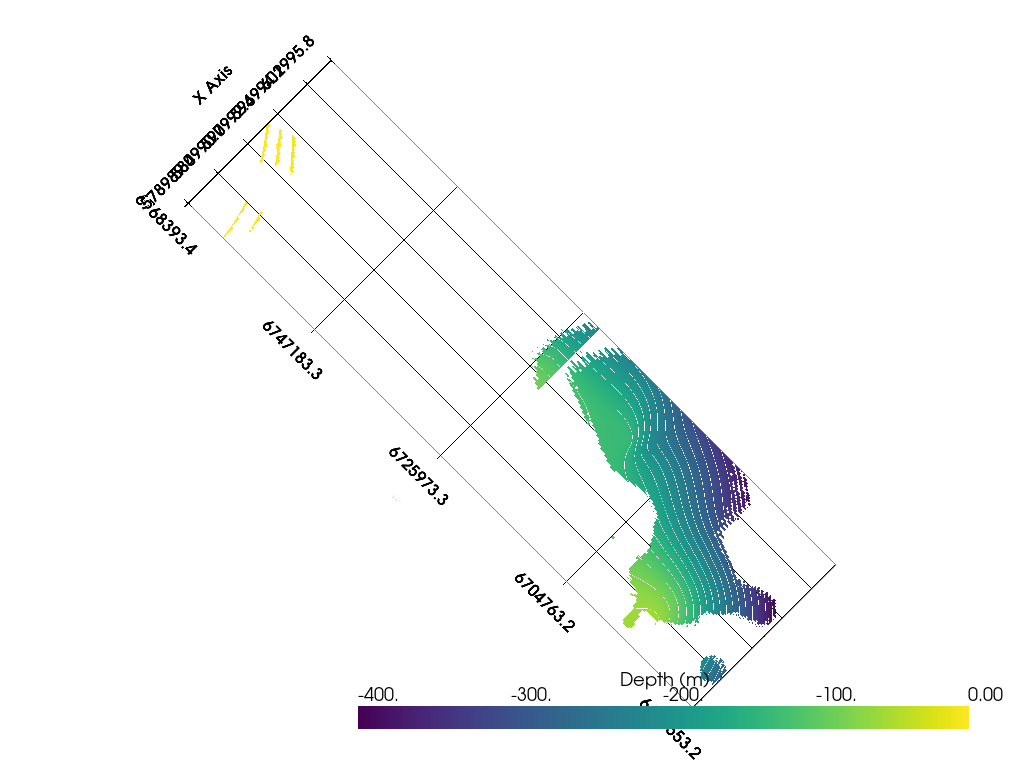

In [53]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([1, 1, 0])
p.add_mesh(mesh4.contour(np.arange(-400,0,20)), color='white')
p.add_mesh(mesh4, scalars='Depth [m]', show_scalar_bar=False, clim = [-400,0])
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black', font_size=12)
p.set_scale(zscale=1)
p.show()

In [54]:
meshpl

PolyData (0x2081b7b9f60)
  N Cells:    91136
  N Points:   46919
  N Strips:   0
  X Bounds:   5.712e+05, 6.030e+05
  Y Bounds:   6.667e+06, 6.774e+06
  Z Bounds:   -4.900e+02, 1.492e+01
  N Arrays:   1

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


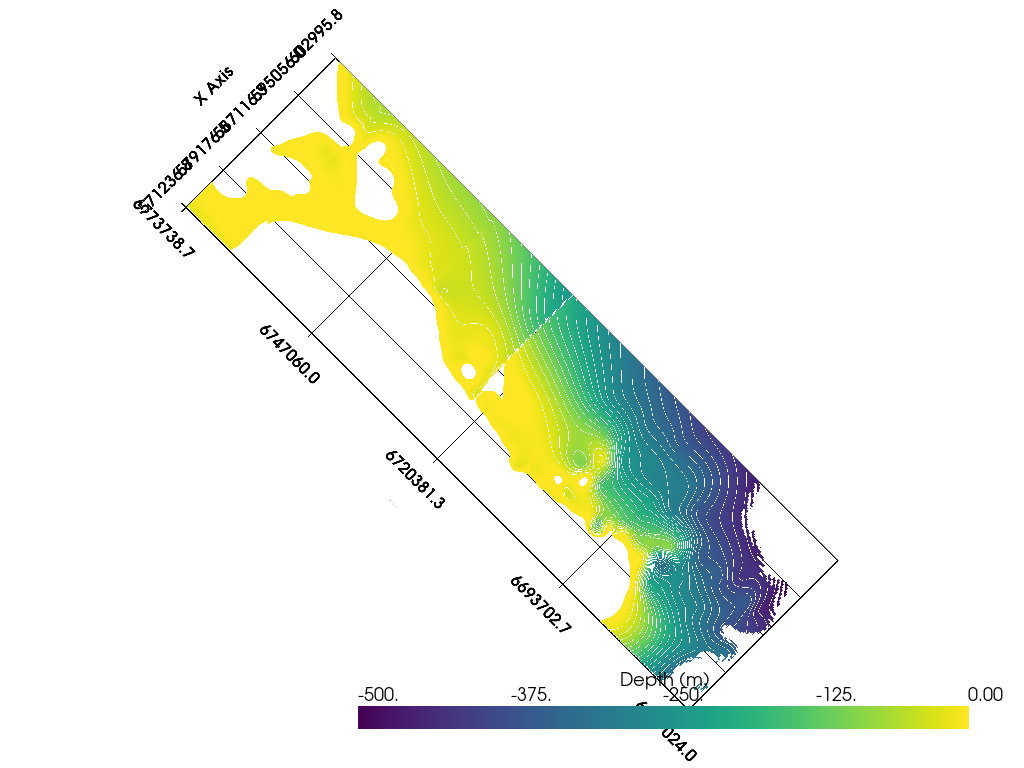

In [55]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([1, 1, 0])
p.add_mesh(meshpl.contour(np.arange(-500,0,20)), color='white')
p.add_mesh(meshpl, scalars='Depth [m]', show_scalar_bar=False, clim = [-500,0])
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black', font_size=12)
p.set_scale(zscale=1)
p.show()

In [56]:
meshpar

PolyData (0x207b5f5cf40)
  N Cells:    137868
  N Points:   69835
  N Strips:   0
  X Bounds:   5.712e+05, 6.030e+05
  Y Bounds:   6.658e+06, 6.774e+06
  Z Bounds:   -1.067e+03, -2.230e+02
  N Arrays:   1

C:\Users\ale93371\.conda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


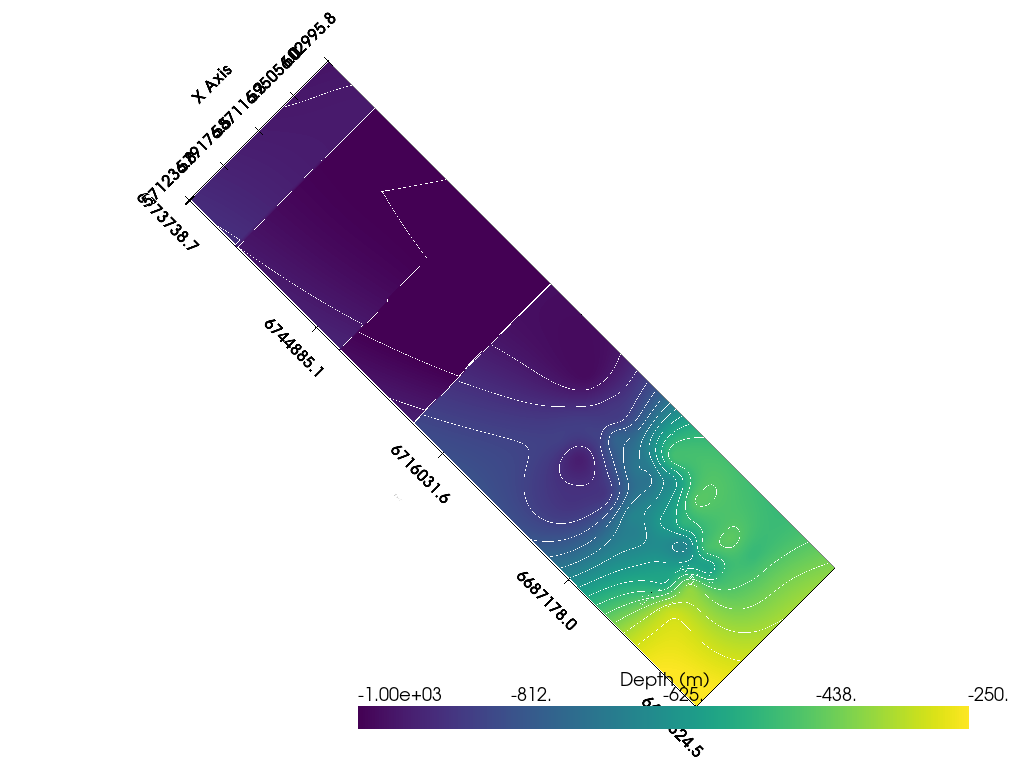

In [57]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([1, 1, 0])
p.add_mesh(meshpar.contour(np.arange(-1000,-250,50)), color='white')
p.add_mesh(meshpar, scalars='Depth [m]', show_scalar_bar=False, clim = [-1000,-250])
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black', font_size=12)
p.set_scale(zscale=1)
p.show()

## Not used code